In [157]:
import pandas as pd
data = pd.read_csv('Salary Data (2).csv')
data.info()
for col in data.columns:
    print(col,': ',sum(data[col].isna()))
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
Age :  2
Gender :  2
Education Level :  2
Job Title :  2
Years of Experience :  2
Salary :  2


In [158]:
numeric_columns = ['Age', 'Salary', 'Years of Experience']
category_columns = ['Gender', 'Education Level', 'Job Title']

In [159]:
for col in category_columns:
    print('\n', col)
    print('Unique Values: ', len(set(data[col])))
    print('Empty:' , sum(data[col].isna()))
    print(data[col].value_counts())


 Gender
Unique Values:  2
Empty: 0
Gender
Male      194
Female    179
Name: count, dtype: int64

 Education Level
Unique Values:  3
Empty: 0
Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

 Job Title
Unique Values:  174
Empty: 0
Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64


In [160]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in category_columns:
    print('\n')
    print(column)
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    for class_index, class_name in enumerate(label_encoders[column].classes_):
        print(f"{class_name}: {class_index}")
    




Gender
Female: 0
Male: 1


Education Level
Bachelor's: 0
Master's: 1
PhD: 2


Job Title
Account Manager: 0
Accountant: 1
Administrative Assistant: 2
Business Analyst: 3
Business Development Manager: 4
Business Intelligence Analyst: 5
CEO: 6
Chief Data Officer: 7
Chief Technology Officer: 8
Content Marketing Manager: 9
Copywriter: 10
Creative Director: 11
Customer Service Manager: 12
Customer Service Rep: 13
Customer Service Representative: 14
Customer Success Manager: 15
Customer Success Rep: 16
Data Analyst: 17
Data Entry Clerk: 18
Data Scientist: 19
Digital Content Producer: 20
Digital Marketing Manager: 21
Director: 22
Director of Business Development: 23
Director of Engineering: 24
Director of Finance: 25
Director of HR: 26
Director of Human Capital: 27
Director of Human Resources: 28
Director of Marketing: 29
Director of Operations: 30
Director of Product Management: 31
Director of Sales: 32
Director of Sales and Marketing: 33
Event Coordinator: 34
Financial Advisor: 35
Financia

In [161]:
data['Salary'].value_counts(ascending=False)

Salary
40000.0     31
50000.0     22
95000.0     22
180000.0    20
120000.0    20
90000.0     18
150000.0    18
45000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
70000.0      9
65000.0      9
105000.0     6
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: count, dtype: int64

In [162]:
for col in numeric_columns:
    print( col, 'Empty:' , sum(data[col].isna()))
print(data[numeric_columns].describe())

Age Empty: 0
Salary Empty: 0
Years of Experience Empty: 0
              Age         Salary  Years of Experience
count  373.000000     373.000000           373.000000
mean    37.431635  100577.345845            10.030831
std      7.069073   48240.013482             6.557007
min     23.000000     350.000000             0.000000
25%     31.000000   55000.000000             4.000000
50%     36.000000   95000.000000             9.000000
75%     44.000000  140000.000000            15.000000
max     53.000000  250000.000000            25.000000


In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = data.select_dtypes(include=['float', 'int64']).columns.tolist()
columns.remove('Salary')
print(len(columns))

mm_scalers = {}
for column in columns:
    mm_scalers[column] = MinMaxScaler()
    data[column] = mm_scalers[column].fit_transform(data[column].values.reshape(-1, 1))

5


In [164]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Salary')
y = data['Salary']


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Coef: ',reg.coef_)
print('intercept_', reg.intercept_)

Coef:  [102019.6875001    7384.17507075  30579.50611229   6627.36734243
  53878.11629044]
intercept_ 14243.009870414055


In [167]:
y_pred = reg.predict(X_test)

In [168]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

print("R-squared:", r2_score(y_test, y_pred))
#R-squared value of 0.886 indicates that approximately 88.6% of the variance in the target variable can be explained by the features used in the model.
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
#RMSE of approximately 16049.02 means that, on average, the model's predictions are off by around $16049.02.

R-squared: 0.888212607358783
Mean Absolute Error: 11377.183126703096
Median Absolute Error: 8320.821301534204
Mean Squared Error: 252493731.91717702
Root Mean Squared Error: 15890.051350363126


In [169]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.300000,1.0,0.0,0.919075,0.20,90000.0
1,0.166667,0.0,0.5,0.098266,0.12,65000.0
2,0.733333,1.0,1.0,0.751445,0.60,150000.0
3,0.433333,0.0,0.0,0.583815,0.28,60000.0
4,0.966667,1.0,0.5,0.127168,0.80,200000.0
...,...,...,...,...,...,...
370,0.400000,0.0,0.0,0.757225,0.32,85000.0
371,0.666667,1.0,0.5,0.173410,0.76,170000.0
372,0.200000,0.0,0.0,0.404624,0.08,40000.0
373,0.366667,1.0,0.0,0.791908,0.28,90000.0


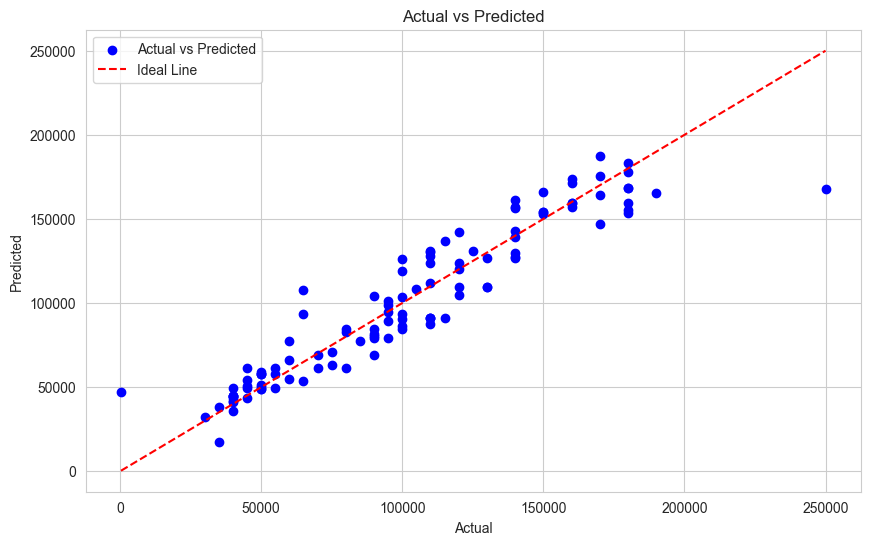

In [170]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [171]:
huber = HuberRegressor().fit(X_train, y_train)


In [172]:
y_pred = huber.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
#R-squared value of 0.886 indicates that approximately 88.6% of the variance in the target variable can be explained by the features used in the model.
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.8877460028847141
Mean Absolute Error: 11297.001861178305
Median Absolute Error: 7059.181714621984
Mean Squared Error: 253547649.55675417
Root Mean Squared Error: 15923.179630863748


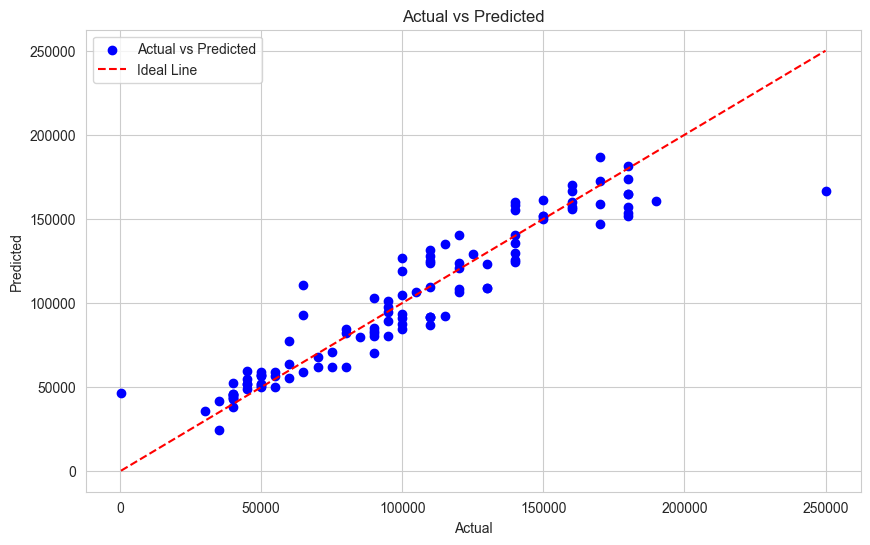

In [173]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()